In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector=inspect(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
measurements=engine.execute('SELECT * FROM Measurement')

In [10]:
print(measurements.keys())

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


In [11]:
most_recent=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent)

('2017-08-23',)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
station=engine.execute('SELECT * FROM Station')
print(station.keys())

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])


In [13]:
# Calculate the date one year from the last date in data set.
one_year_from=dt.date(2017, 8, 23) - dt.timedelta(days=364)
print(one_year_from)

2016-08-24


In [14]:
# Perform a query to retrieve the data (date?) and precipitation scores
scores= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_from).order_by(Measurement.date).all()
scores

[('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('2016-08-31', None),
 ('2016-08-31', None),
 ('2016-08-31', 0.25),
 ('2016-08-31', 0.24),
 ('

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
scores_df=pd.DataFrame(scores, columns=['date', 'prcp'])
scores_df.set_index('date',inplace=True)
scores_df

,prcp
date,
2016-08-25,0.08
2016-08-25,0.08
2016-08-25,0.00
2016-08-25,0.00
2016-08-25,0.21
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


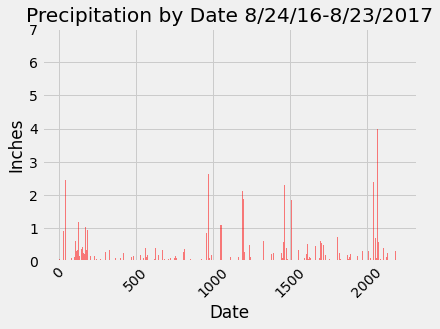

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis_pd = np.arange(len(scores_df))
plt.bar(x_axis_pd, scores_df["prcp"], color='r', alpha=0.5, align="center")
tick_spacing = 230
plt.title("Precipitation by Date 8/24/16-8/23/2017")
plt.xticks(rotation=45)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

#for some reason I had a hard time formatting this graph to look right

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
scores_df.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
stations_total = session.query(Station).count()
stations_total

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

#https://stackoverflow.com/questions/1052148/group-by-count-function-in-sqlalchemy
most_active =session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station)\
    .desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_info=(session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281')\
    .all())
temp_info


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_20167=(session.query(Measurement.date, Measurement.tobs))\
    .filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date > one_year_from)\
    .all()

temp_20167_df=pd.DataFrame(temp_20167)
temp_20167_df

,0,1
0,2016-08-25,80.0
1,2016-08-26,80.0
2,2016-08-27,75.0
3,2016-08-28,73.0
4,2016-08-29,78.0
...,...,...
345,2017-08-14,77.0
346,2017-08-15,77.0
347,2017-08-16,76.0
348,2017-08-17,76.0


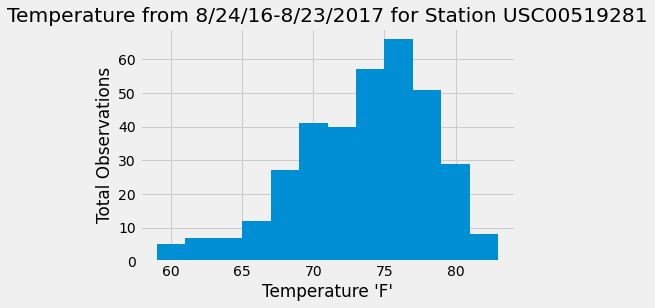

In [22]:
plt.hist(temp_20167_df[1],12)
plt.xlabel("Temperature 'F'")
plt.ylabel("Total Observations")
plt.title("Temperature from 8/24/16-8/23/2017 for Station USC00519281")
plt.show()

# Close session

In [23]:
# Close Session
session.close()